# Sentiment Analysis

## Problem Overview

This project aims to evaluate the performance of a BERT model variation specifically designed for sentiment analysis, namely bert-base-uncased-sentiment, in predicting sentiment on social media text, particularly Twitter. The model classifies sentiment into three categories: positive, negative, and neutral. In this experiment, the model's predicted results will be compared to the manually labeled true ground truth to measure the model's accuracy in predicting sentiment correctly.

Performance evaluation is conducted using the accuracy metric, which measures the proportion of correct predictions compared to the total predictions. By comparing the predicted results with the true ground truth, the study aims to provide a clear picture of the model's ability to accurately predict sentiment, as well as identify potential improvements or further developments needed to enhance the model's performance.

## Import Function & Dataset

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=5951a048a733b34a3332e84fff94fa390d13f411475933a9fbd3b1b3fe59353d
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
import pandas as pd

In [ ]:
# C:\Users\USER\.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syahmisajid12","key":"a76cee502ebc4268b9b384c1c587dfe1"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 78% 63.0M/80.9M [00:00<00:00, 235MB/s]
100% 80.9M/80.9M [00:00<00:00, 231MB/s]


In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, view_random_images,pred_and_plot, load_and_prep_image

--2025-01-18 07:20:30--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0s      

2025-01-18 07:20:30 (87.6 MB/s) - ‘helper_functions.py’ saved [11485/11485]



## Dataframe

In [ ]:
unzip_data("/content/sentiment140.zip")

In [ ]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding =DATASET_ENCODING , names=DATASET_COLUMNS)
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
import pandas as pd

# Misalnya df adalah DataFrame Anda
jumlah_setiap_nilai = df['target'].value_counts()
print(f"Jumlah label:\n{jumlah_setiap_nilai.head()}")

Jumlah label:
target
negative    800000
positive    800000
Name: count, dtype: int64


In [ ]:
print(f"Jumlah Data Asli: {df.shape[0]}")
df = df.sample(2500)
print(f"Jumlah Data Filter: {df.shape[0]}")

Jumlah Data Asli: 1600000
Jumlah Data Filter: 2500


## Pre-processing

### Change Label Name

In [ ]:
import pandas as pd

# Misalnya df adalah DataFrame Anda
df['target'] = df['target'].replace({0: 'negative', 4: 'positive'})

df.head()

,target,ids,date,flag,user,text
0,negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Data Label Proposition

In [ ]:
# Misalnya df adalah DataFrame Anda
jumlah_setiap_nilai = df['target'].value_counts()
print(f"Jumlah label:\n{jumlah_setiap_nilai.head()}")

Jumlah label:
target
positive    1287
negative    1213
Name: count, dtype: int64


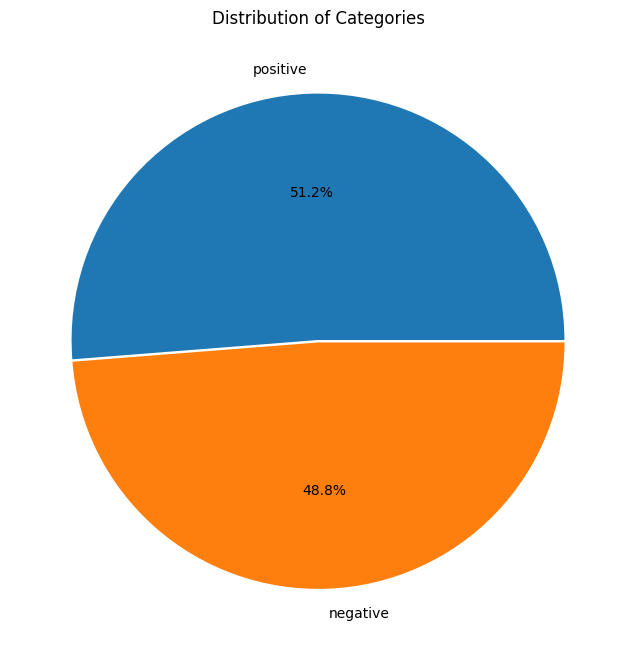

In [ ]:
import matplotlib.pyplot as plt

# Menghitung frekuensi nilai unik
category_counts = df['target'].value_counts()

label_fraud = ["positive", "negative"]
# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(x=category_counts, labels=['positive','negative'], explode=[0.0, 0.01], autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

### Check Null Row

In [ ]:
import pandas as pd

# Misalnya df adalah DataFrame Anda
jumlah_null = df['text'].isnull().sum()

print(f"Jumlah nilai kosong pada kolom 'text': {jumlah_null}")


Jumlah nilai kosong pada kolom 'text': 0


### Cleaning Data

In [ ]:
import pandas as pd
import re

# Menghapus kata yang diawali dengan @
df['text'] = df['text'].apply(lambda x: re.sub(r'@\S+', '', x))

# Fungsi untuk menghapus kata yang diawali dengan @ atau mengandung http/https
df['text'] = df['text'].apply(lambda x: re.sub(r'(@\S+|http[s]?://\S+)', '', x))

df.head(10)

,target,ids,date,flag,user,text
82376,negative,1753031468,Sat May 09 23:52:07 PDT 2009,NO_QUERY,AgonTheRican,originally from NY....but i live in Kansas no...
786158,negative,2324596126,Thu Jun 25 03:33:43 PDT 2009,NO_QUERY,maddyishere,aww i wish i could have gone
1278771,positive,2001464419,Tue Jun 02 00:58:32 PDT 2009,NO_QUERY,gutterbox20,yay!
940251,positive,1793880398,Thu May 14 04:17:39 PDT 2009,NO_QUERY,ebrown2112,"btw, why r u sending direct messages?"
627909,negative,2231084561,Thu Jun 18 18:01:25 PDT 2009,NO_QUERY,FiLapham88,"In the samuel household,very strange without m..."
1107003,positive,1971512806,Sat May 30 07:16:56 PDT 2009,NO_QUERY,piginthepoke,may ask for that my self next time I get my e...
379104,negative,2052260445,Sat Jun 06 00:08:55 PDT 2009,NO_QUERY,Jabawocky,"Played on the snow, well only small bits of it..."
177397,negative,1965651336,Fri May 29 16:17:51 PDT 2009,NO_QUERY,nickyy123,Nobody is up this early
644936,negative,2236151258,Fri Jun 19 02:58:59 PDT 2009,NO_QUERY,FLHarrison,i have a gammy eye this morning
1173189,positive,1980731446,Sun May 31 07:31:47 PDT 2009,NO_QUERY,sassyjenny,heading to crawfish festival at fairgrounds in...


### Filter English Comment

In [ ]:
import pandas as pd
from langdetect import detect, LangDetectException

# Fungsi untuk mendeteksi bahasa dalam DataFrame
def detect_language_in_df(df, text_column):
    """
    Mendeteksi bahasa dari kolom teks dalam DataFrame dan menambahkan kolom 'language' yang berisi kode bahasa.

    Parameters:
    df (pd.DataFrame): DataFrame yang berisi data teks.
    text_column (str): Nama kolom yang berisi teks untuk deteksi bahasa.

    Returns:
    pd.DataFrame: DataFrame yang telah ditambahkan kolom 'language' dengan kode bahasa terdeteksi.
    """
    def safe_detect(text):
        try:
            # Pastikan teks tidak kosong atau None
            if isinstance(text, str) and text.strip():
                return detect(text)
            else:
                return None
        except LangDetectException:
            # Menangani error ketika deteksi bahasa gagal
            return None

    # Menerapkan safe_detect untuk menghindari error
    df['language'] = df[text_column].apply(safe_detect)
    return df
# Mendeteksi bahasa pada kolom 'text'
df = detect_language_in_df(df, 'text')
df.head()

,target,ids,date,flag,user,text,language
82376,negative,1753031468,Sat May 09 23:52:07 PDT 2009,NO_QUERY,AgonTheRican,originally from NY....but i live in Kansas no...,en
786158,negative,2324596126,Thu Jun 25 03:33:43 PDT 2009,NO_QUERY,maddyishere,aww i wish i could have gone,en
1278771,positive,2001464419,Tue Jun 02 00:58:32 PDT 2009,NO_QUERY,gutterbox20,yay!,so
940251,positive,1793880398,Thu May 14 04:17:39 PDT 2009,NO_QUERY,ebrown2112,"btw, why r u sending direct messages?",en
627909,negative,2231084561,Thu Jun 18 18:01:25 PDT 2009,NO_QUERY,FiLapham88,"In the samuel household,very strange without m...",en


In [ ]:
import pandas as pd

# Misalnya df adalah DataFrame Anda
jumlah_setiap_nilai = df['language'].value_counts()

print(f"Jumlah setiap nilai unik pada kolom 'kolom_teks':\n{jumlah_setiap_nilai.head()}")

Jumlah setiap nilai unik pada kolom 'kolom_teks':
language
en    2283
so      36
af      26
fr      14
no      13
Name: count, dtype: int64


In [ ]:
import pandas as pd

nilai_unik = df['language'].unique()
print(f"Nilai unik pada kolom sebelum filter 'language': {nilai_unik}")

# Misalnya df adalah DataFrame Anda
df = df[df['language'] == 'en']

nilai_unik = df['language'].unique()
print(f"Nilai unik pada kolom sesudah filter 'language': {nilai_unik}")

Nilai unik pada kolom sebelum filter 'language': ['en' 'so' 'fi' 'pl' 'cy' 'vi' 'it' 'af' 'cs' 'ca' 'da' 'tl' None 'et'
 'sl' 'id' 'hr' 'nl' 'no' 'de' 'sq' 'fr' 'pt' 'sv' 'tr' 'es' 'sw' 'lt'
 'hu' 'ro' 'sk']
Nilai unik pada kolom sesudah filter 'language': ['en']


## Predict Sentiment

In [ ]:
  import pandas as pd
  import re
  import nltk
  from nltk.corpus import stopwords
  from nltk.tokenize import word_tokenize
  from transformers import pipeline

  # Unduh stopwords dari NLTK jika belum diunduh
  nltk.download('punkt')
  nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
from tqdm import tqdm

# Menambahkan tqdm.pandas() untuk progress bar
tqdm.pandas()

def preprocess_review(review):
    # Potong teks agar panjang token tidak melebihi batas
    return review[:512]  # 512 adalah panjang maksimal token

# Memproses ulasan dengan progress bar
df['processed_comment'] = df['text'].progress_apply(preprocess_review)

sentiment_results = [sentiment_analysis([comment])[0] for comment in tqdm(df['processed_comment'], desc="Sentiment Analysis")]
# Melakukan prediksi sentimen untuk setiap ulasan yang sudah diproses
# sentiment_results = sentiment_analysis(df['processed_comment'].tolist())

# Menambahkan kolom 'sentiment' dan 'score' ke DataFrame
df['sentiment'] = [result['label'] for result in sentiment_results]
df['confidence_sentiment_score'] = [result['score'] for result in sentiment_results]

# Mapping label ke kategori sentimen baru
label_mapping = {
    'LABEL_0': 'negative',
    'LABEL_1': 'neutral',
    'LABEL_2': 'positive'
}

# Mengubah nilai pada kolom sentimen
df['sentiment'] = df['sentiment'].map(label_mapping)

Sentiment Analysis: 100%|██████████| 2283/2283 [00:24<00:00, 94.16it/s] 


In [ ]:
# df.head()

In [ ]:
import pandas as pd

# Misalnya df adalah DataFrame Anda
jumlah_setiap_nilai = df['sentiment'].value_counts()
print(f"Jumlah label:\n{jumlah_setiap_nilai.head()}")

Jumlah label:
sentiment
positive    875
negative    740
neutral     668
Name: count, dtype: int64


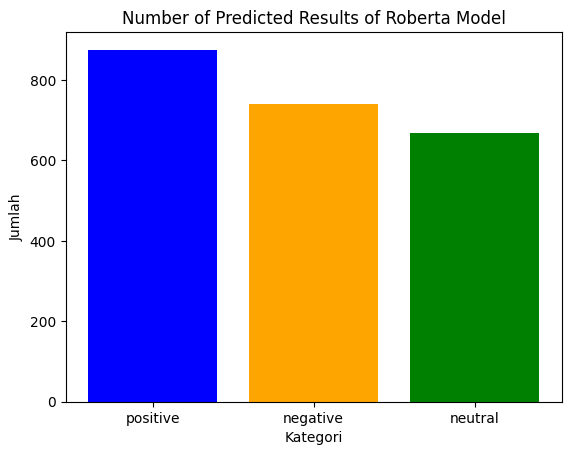

In [3]:
import matplotlib.pyplot as plt

# Data
categories = ['positive', 'negative', 'neutral']
values = [875, 740, 668]

# Membuat diagram batang
plt.bar(categories, values, color=['blue', 'orange', 'green'])

# Menambahkan judul dan label
plt.title('Number of Predicted Results of Roberta Model')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')

# Menampilkan grafik
plt.show()

In [ ]:
import pandas as pd

# Misalnya df adalah DataFrame Anda dan kolom yang dimaksud adalah kolom dengan nama '1'
df_filtered = df[df['sentiment'] != 'neutral']

In [ ]:
import pandas as pd

# Misalnya df_filtered adalah DataFrame Anda
jumlah_setiap_nilai = df_filtered['sentiment'].value_counts()
print(f"Jumlah label:\n{jumlah_setiap_nilai.head()}")

Jumlah label:
sentiment
positive    875
negative    740
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Misalnya df adalah DataFrame Anda
jumlah_sama = (df_filtered['sentiment'] == df_filtered['target']).sum()

print(f"Jumlah baris yang memiliki nilai yang sama pada kolom 'sentiment' dan 'target': {jumlah_sama}")


Jumlah baris yang memiliki nilai yang sama pada kolom 'sentiment' dan 'target': 1339


In [ ]:
jumlah_sama

1339

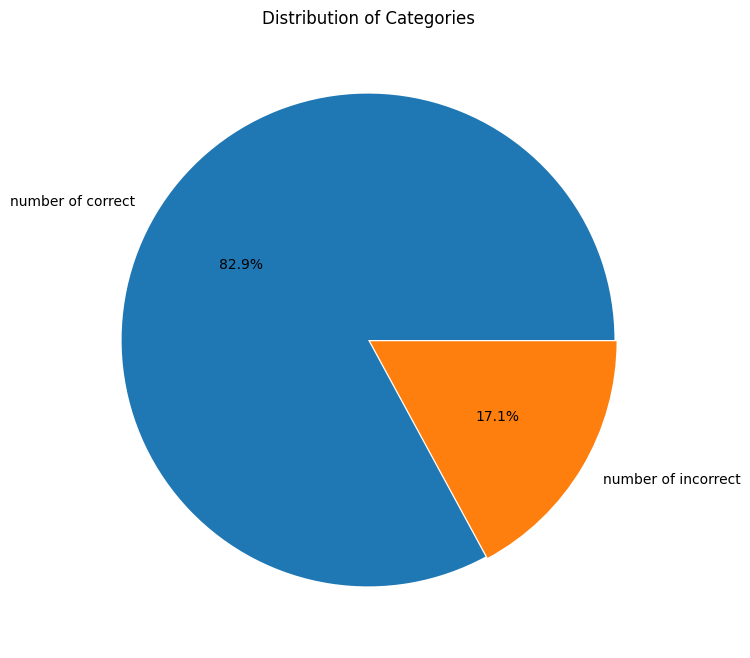

In [ ]:
import matplotlib.pyplot as plt

# Menghitung frekuensi nilai unik
category_counts = [jumlah_sama, df_filtered.shape[0] - jumlah_sama]

label_fraud = ["number of correct", "number of incorrect"]
# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(x=category_counts, labels=['number of correct','number of incorrect'], explode=[0.0, 0.01], autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

In [ ]:
# Menyesuaikan tampilan agar kolom teks tidak terpotong
pd.set_option('display.max_colwidth', None)  # Menampilkan seluruh konten kolom teks

# Mengatur agar pandas menampilkan semua baris
pd.set_option('display.max_rows', None)

In [ ]:
df_filtered[['text', 'target', 'sentiment']].sample(10)

,text,target,sentiment
816921,Good morning everyone. I'm sure glad I'm in Phoenix and not Denver!,positive,positive
330915,I had tickets but had to bail due to work. Sounds like it was going to be a blast.,negative,positive
769660,Good thing you didn't TwitPic!,negative,positive
832594,i have 92 friends in pet society. wow!,positive,positive
556473,theres something in my eye !! ouchie and noones awake at my crib to help me,negative,negative
643536,"Really feeling lik crap , may go back to bed sniff sniff",negative,negative
100150,Here we are. Stinks of haircare in here. I DON'T DO HAIRCARE.,negative,negative
984234,nearly losst his pc but god dammit he killed that mother fucker,positive,negative
1375174,hehe - well thanks for the tip on the Oceanside restaurant. lol,positive,positive
651042,As if the storm wasn't scaring me enough just got a creepy phone call on our apartment phone too *Abby*,negative,negative


In [ ]:
print(df_filtered.shape[0])
print(jumlah_sama)
print(f'{round(jumlah_sama / df_filtered.shape[0], 2)}%')

1615
1339
0.83%


### Wrong Predict

In [ ]:
import pandas as pd

# Misalnya dataframe kamu adalah df
df_wrong = df_filtered[df_filtered['target'] != df_filtered['sentiment']]
df_wrong[['text', 'target', 'sentiment']].sample(10)

,text,target,sentiment
120842,"Wow, David actually invited me to the Fazed meet up. I really want to go, but I also need to go to the coast at the same time",negative,positive
90006,Happy Mothers day! I wish I was in Florida with my momma,negative,positive
83672,I agree. POOR ALLISON!!,negative,positive
1582030,"Hey twitter, I'm sorry I've neglected you so long, its just you seemed like text messaging to nobody, I ramble about nerdy stuff, listen?",positive,negative
722076,Lampin' in the Hamptons...... Wishing I was with her !!!!!!!,negative,positive
1415931,Do. We. Really. Need. Another. Social. Network. FIGHT BACK! Say NO to Tagged.com!,positive,negative
134491,"i now have sky in my room, i love it! i really do have the cold now",negative,positive
1485259,"I got so much sleep last night. But, my neck is sooo god damn sore. :|",positive,negative
1492361,Yeahh but im being slow to reply atm joshypearson,positive,negative
1383342,"yes!!! cuz rite now, I Gots no one to talk Eragon to so I can't make any refferances",positive,negative
